# Importing Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Preparing Data

In [2]:
def prep_data(timeseries,features):
    x,y=[],[]
    for i in range(len(timeseries)):
        end_idx=i+features
        if end_idx>len(timeseries)-1:
            break
        seq_x,seq_y=timeseries[i:end_idx],timeseries[end_idx]
        x.append(seq_x)
        y.append(seq_y)
    return np.array(x),np.array(y)

In [3]:
timeseries=[110,125,133,146,158,172,187,196,210]
features=3
x,y=prep_data(timeseries,features)

In [4]:
x

array([[110, 125, 133],
       [125, 133, 146],
       [133, 146, 158],
       [146, 158, 172],
       [158, 172, 187],
       [172, 187, 196]])

In [5]:
y

array([146, 158, 172, 187, 196, 210])

In [6]:
x.shape,y.shape

((6, 3), (6,))

# Reshape
samples,timesteps->samples,timestps,features

In [7]:
n_features=1
x=x.reshape((x.shape[0],x.shape[1],n_features))

we do this to convert to 3d

In [8]:
x.shape

(6, 3, 1)

# Model Building

In [9]:
model=Sequential()
model.add(LSTM(50,activation='relu',return_sequences=True,input_shape=(features,n_features)))
model.add(LSTM(50,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

# Model Training

In [10]:
model.fit(x,y,epochs=200,verbose=0)

# Prediction
next 10 days

In [11]:
x_input=np.array([187,196,210])
temp_input=list(x_input)
lst_output=[]
i=0
while(i<10):
    if(len(temp_input)>3):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape((1, features, n_features))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1,features, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
print(lst_output)

[225.96095]
1 day input [196.         210.         225.96095276]
1 day output [[237.98587]]
2 day input [210.         225.96095276 237.98587036]
2 day output [[253.72917]]
3 day input [225.96095 237.98587 253.72917]
3 day output [[270.09506]]
4 day input [237.98587 253.72917 270.09506]
4 day output [[285.1983]]
5 day input [253.72917 270.09506 285.1983 ]
5 day output [[302.9942]]
6 day input [270.09506 285.1983  302.9942 ]
6 day output [[321.17834]]
7 day input [285.1983  302.9942  321.17834]
7 day output [[339.5642]]
8 day input [302.9942  321.17834 339.5642 ]
8 day output [[359.99854]]
9 day input [321.17834 339.5642  359.99854]
9 day output [[381.05667]]
[225.96095, 237.98587, 253.72917, 270.09506, 285.1983, 302.9942, 321.17834, 339.5642, 359.99854, 381.05667]


# Visualisation

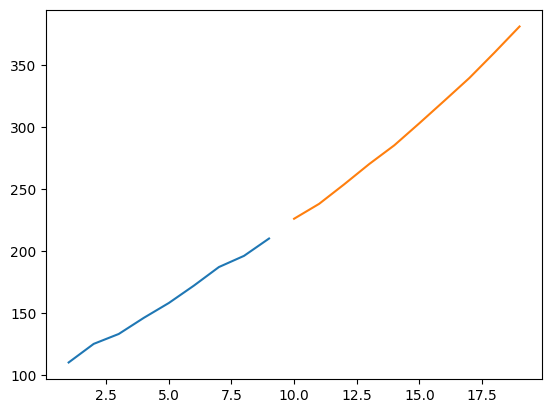

In [12]:
day_new=np.arange(1,10)
day_pred=np.arange(10,20)
plt.plot(day_new,timeseries)
plt.plot(day_pred,lst_output)